# Shortest Credible Interval for Beta Distribution

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [182]:
def beta_ci(distribution_α, distribution_β, α=.05, num_samples=50, print_report=True, plot_report=True):
    if α > .5:
        raise ValueError('α should be less than 50%.')
    
    distribution = beta(distribution_α, distribution_β)
    
    lower_tails = np.linspace(0, α, num=num_samples)
    upper_tails = α - lower_tails
    
    # The resulting interval will be [p, q]
    ps = distribution.ppf(lower_tails)
    qs = distribution.ppf(1 - upper_tails)
    
    interval_lengths = qs - ps
        
    report_df = pd.DataFrame({
        'lower_tail': lower_tails,
        'interval_start': ps,
        'interval_end': qs,
        'upper_tail': upper_tails,
        'interval_length': interval_lengths
    })
    
    if print_report:
        print(report_df)
    
    _, shortest_ci = min(report_df.iterrows(), key=lambda x: x[1].interval_length)
    symmetric_ci = distribution.ppf(np.array([α/2, 1-α/2]))
    print('Shortest  CI: [{:.3f}, {:.3f}]'.format(shortest_ci.interval_start, shortest_ci.interval_end))
    print('Symmetric CI: [{:.3f}, {:.3f}]'.format(symmetric_ci[0], symmetric_ci[1]))
    
    if plot_report:
        plot_xs = np.linspace(0, 1, 101)
        plot_ys = distribution.pdf(plot_xs)
        plt.plot(plot_xs, plot_ys, label='Density')

        segment_xs, segment_ys = np.array([shortest_ci.interval_start, shortest_ci.interval_end]), [0, 0]
        plt.plot(segment_xs, segment_ys, 'b|-', alpha=.5, label='Shortest CI')
        segment_xs, segment_ys = np.array([symmetric_ci[0], symmetric_ci[1]]), [0, 0]
        plt.plot(segment_xs, segment_ys, 'r|-', alpha=.5, label='Symmetric CI')

        plt.legend()

    lower_tail  interval_start  interval_end  upper_tail  interval_length
0        0.000        0.000000      0.923453       0.010         0.923453
1        0.001        0.477842      0.925142       0.009         0.447300
2        0.002        0.499384      0.926975       0.008         0.427590
3        0.003        0.512679      0.928984       0.007         0.416305
4        0.004        0.522452      0.931217       0.006         0.408765
5        0.005        0.530242      0.933748       0.005         0.403506
6        0.006        0.536750      0.936690       0.004         0.399940
7        0.007        0.542358      0.940252       0.003         0.397894
8        0.008        0.547297      0.944872       0.002         0.397575
9        0.009        0.551718      0.951829       0.001         0.400111
10       0.010        0.555726      1.000000       0.000         0.444274
Shortest  CI: [0.547, 0.945]
Symmetric CI: [0.530, 0.934]


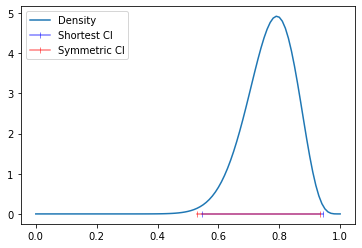

In [183]:
beta_ci(distribution_α=20, distribution_β=6, α=.01, num_samples=11, print_report=True, plot_report=True)